<a href="https://colab.research.google.com/github/AndreiAf02/Data-Balancing-in-ML-DNN/blob/main/Diabetes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Diabetes Health Indicators - ML Classification with Random Under/Oversampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)



In [4]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [5]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [6]:
## Scaling the predictive data

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [7]:
data2 = pd.concat([X_scaled, y], axis=1)
data2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714,0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000,0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000,0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143,0
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571,1
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857,0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000,0


In [8]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


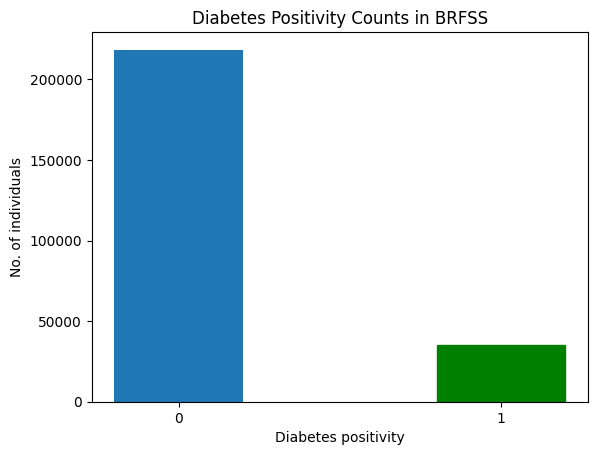

In [9]:
barlist = plt.bar([str(0),str(1)], y.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS")
plt.show()

# Full Dataset:

In [12]:
X_scaled

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000


In [13]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


## DNN Classification Algorithm:

In [52]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model



def train_and_evaluate_ml(model, X_train, X_test, y_train, y_test, domain):

    # time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)

    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)

    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    ## To deactivate after!!! ----------------------------------------
    ##### Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    ## To deactivate after!!! ----------------------------------------

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    return fpr, tnr, fnr, tpr


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [17]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (202944, 21)
y_train: (202944, 1)
X_test: (50736, 21)
y_test: (50736, 1)


In [63]:
## Establishing the Under/Oversampling values and imbalance ratio:

undersample_size = min(data_train['Diabetes_binary'].value_counts())
oversample_size = max(data_train['Diabetes_binary'].value_counts())


data_majority = data_train[data_train['Diabetes_binary']==0]
data_minority = data_train[data_train['Diabetes_binary']==1]

print(undersample_size)
print(oversample_size)

28135
174809


## Imbalanced (Original) data:

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5074/5074 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - AUC: 0.7763 - loss: 0.3419 - val_AUC: 0.8213 - val_loss: 0.3194
Epoch 2/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.8224 - loss: 0.3182 - val_AUC: 0.8245 - val_loss: 0.3128
Epoch 3/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.8215 - loss: 0.3167 - val_AUC: 0.8249 - val_loss: 0.3142
Epoch 4/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.8233 - loss: 0.3166 - val_AUC: 0.8261 - val_loss: 0.3149
Epoch 5/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - AUC: 0.8228 - loss: 0.3165 - val_AUC: 0.8256 - val_loss: 0.3124
Epoch 6/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.8265 - loss: 0.3141 - val_AUC: 0.8261 - val_loss: 0.3122
Epoch 7/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.8271 - loss: 0.3147 - val_AUC: 0.8249 - val_loss: 0.3130
Epoch 8/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.8295 - loss: 0.3114 - val_AUC: 0.8254 - val_loss: 0.3129
Epoch 9/10
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 1

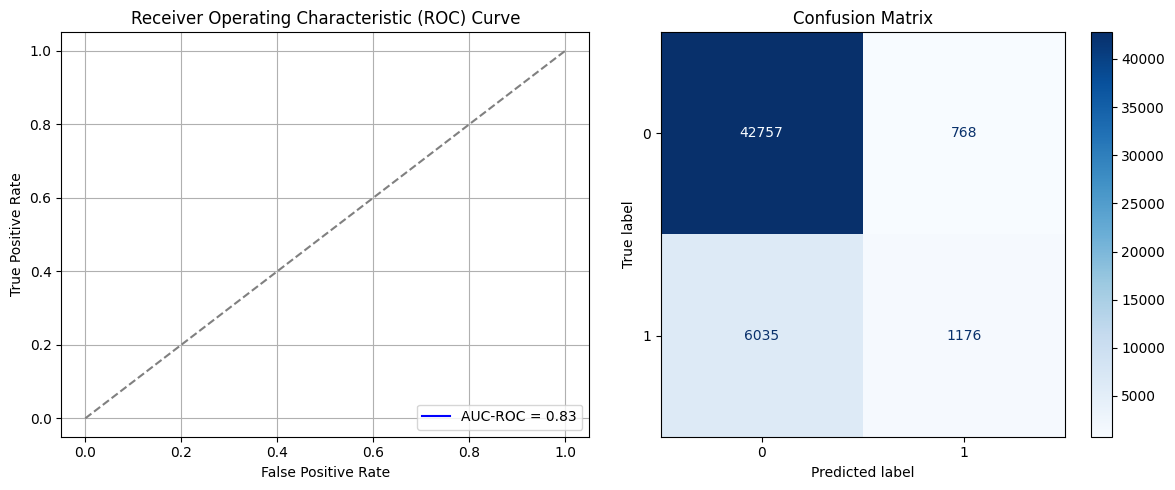

Best threshold based on F1-score: 0.2444424033164978


In [64]:
times = 1

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)
    model_source = create_dnn_model(X_train.shape[1])
    result_imbalanced = train_and_evaluate_ml(model_source, X_train, X_test, y_train, y_test, "Source")
    # result_TL_imbalanced = Transductive_TL(model_source, X_T_full, y_T_full, "Target")

    FPR.append(result_imbalanced[0])
    TNR.append(result_imbalanced[1])
    FNR.append(result_imbalanced[2])
    TPR.append(result_imbalanced[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

In [65]:
print(ParamFit)
# ParamFit.to_csv('Imbalanced.csv')

        FPR       TPR       FNR       TNR
0  0.017645  0.163084  0.836916  0.982355


# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7755 - loss: 0.5422 - val_AUC: 0.0000e+00 - val_loss: 0.6494
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8162 - loss: 0.5017 - val_AUC: 0.0000e+00 - val_loss: 0.6220
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8187 - loss: 0.4966 - val_AUC: 0.0000e+00 - val_loss: 0.6482
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4944 - val_AUC: 0.0000e+00 - val_loss: 0.6431
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.4937 - val_AUC: 0.0000e+00 - val_loss: 0.6785
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8228 - loss: 0.4924 - val_AUC: 0.0000e+00 - val_loss: 0.8194
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8275 - loss: 0.4869 - val_AUC: 0.0000e+00 - val_loss: 0.6571
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8245 - loss: 0.4915 - val_AUC: 0.0000e+00 - val_loss: 0.8039
Epoch 9/10
1407/140

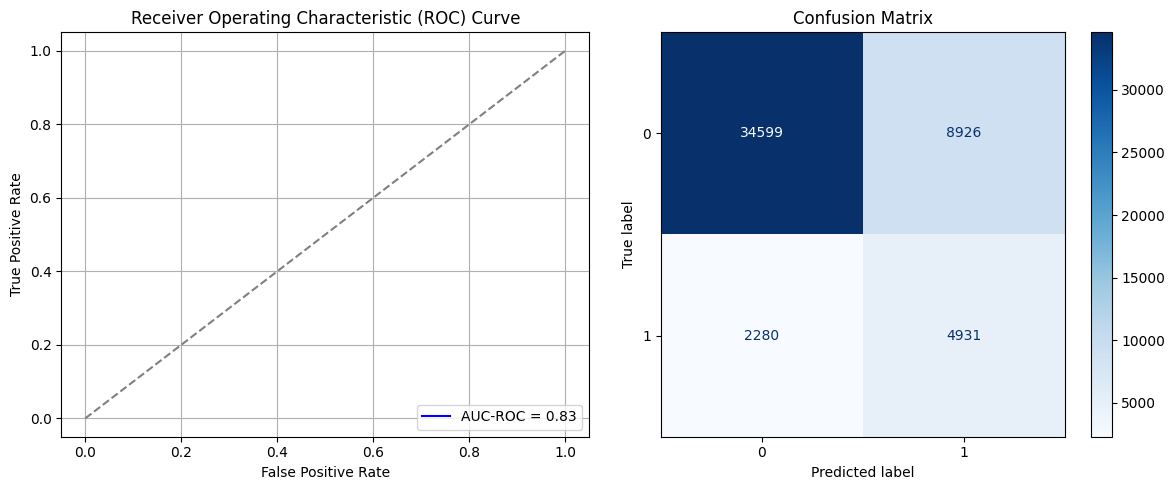

Best threshold based on F1-score: 0.583478569984436


In [66]:
times = 1

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=False)
    data_SRS_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRS_train = data_SRS_RUS.iloc[:, :21]
    y_SRS_train = data_SRS_RUS.iloc[:, 21]
    model_SRS = create_dnn_model(X_SRS_train.shape[1])
    result_SRS = train_and_evaluate_ml(model_SRS, X_SRS_train, X_test, y_SRS_train, y_test, "Source")

    FPR.append(result_SRS[0])
    TNR.append(result_SRS[1])
    FNR.append(result_SRS[2])
    TPR.append(result_SRS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']
# print(ParamFit)

In [67]:
print(ParamFit)
# ParamFit.to_csv('SRS_RUS.csv')

        FPR       TPR       FNR       TNR
0  0.205078  0.683816  0.316184  0.794922


In [ ]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

## Simple Random Sampling with Replacement:

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7739 - loss: 0.5408 - val_AUC: 0.0000e+00 - val_loss: 0.8086
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8178 - loss: 0.4987 - val_AUC: 0.0000e+00 - val_loss: 0.6825
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8203 - loss: 0.4969 - val_AUC: 0.0000e+00 - val_loss: 0.8469
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8264 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.5337
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8213 - loss: 0.4953 - val_AUC: 0.0000e+00 - val_loss: 0.6369
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8265 - loss: 0.4887 - val_AUC: 0.0000e+00 - val_loss: 0.5959
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8247 - loss: 0.4905 - val_AUC: 0.0000e+00 - val_loss: 0.6323
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8305 - loss: 0.4849 - val_AUC: 0.0000e+00 - val_loss: 0.7158
Epoch 9/10
1407/140

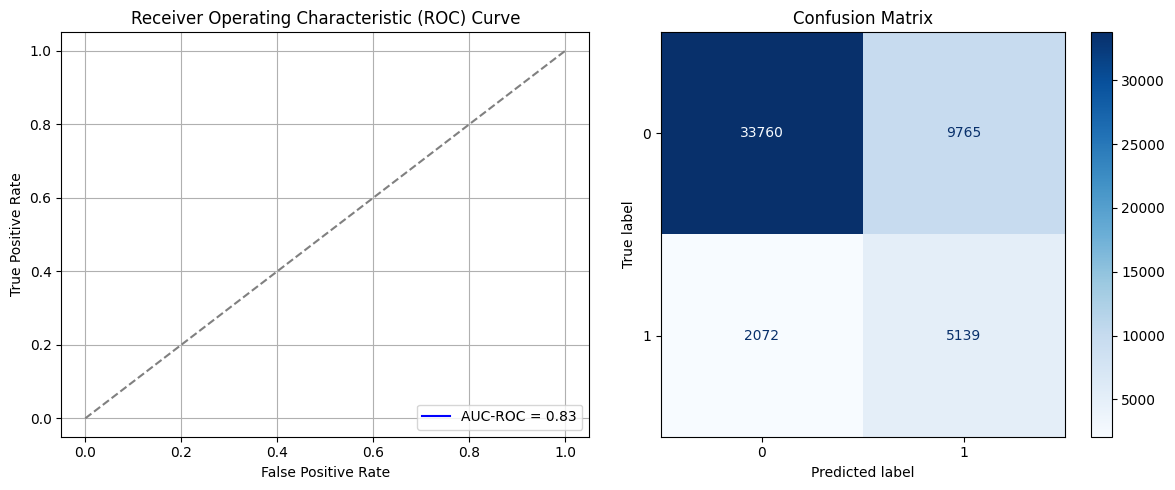

Best threshold based on F1-score: 0.9166401624679565


/tmp/ipython-input-722533245.py:72: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [68]:
times = 1

FPR = []
TPR = []
FNR = []
TNR = []


for i in range(times):
    data_maj_rus = data_majority.sample(n=undersample_size, replace=True)
    data_SRSwR_RUS = pd.concat([data_maj_rus, data_minority])
    X_SRSwR_train = data_SRSwR_RUS.iloc[:, :21]
    y_SRSwR_train = data_SRSwR_RUS.iloc[:, 21]
    model_SRSwR = create_dnn_model(X_SRSwR_train.shape[1])
    result_SRSwR = train_and_evaluate_ml(model_SRSwR, X_SRSwR_train, X_test, y_SRSwR_train, y_test, "Source")

    FPR.append(result_SRSwR[0])
    TNR.append(result_SRSwR[1])
    FNR.append(result_SRSwR[2])
    TPR.append(result_SRSwR[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

In [69]:
print(ParamFit)
# ParamFit.to_csv('SRSwR_RUS.csv')

        FPR       TPR       FNR       TNR
0  0.224354  0.712661  0.287339  0.775646


In [70]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

np.float64(0.2873387879628346)

## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

6.21322196552337
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.7737 - loss: 0.5429 - val_AUC: 0.0000e+00 - val_loss: 0.6850
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8122 - loss: 0.5056 - val_AUC: 0.0000e+00 - val_loss: 0.7454
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8192 - loss: 0.4968 - val_AUC: 0.0000e+00 - val_loss: 0.7617
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4967 - val_AUC: 0.0000e+00 - val_loss: 0.7731
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8212 - loss: 0.4947 - val_AUC: 0.0000e+00 - val_loss: 0.6539
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8251 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6897
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8209 - loss: 0.4964 - val_AUC: 0.0000e+00 - val_loss: 0.6328
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8269 - loss: 0.4890 - val_AUC: 0.0000e+00 - val_loss: 0.6361
Epoch 9/10
1407/140

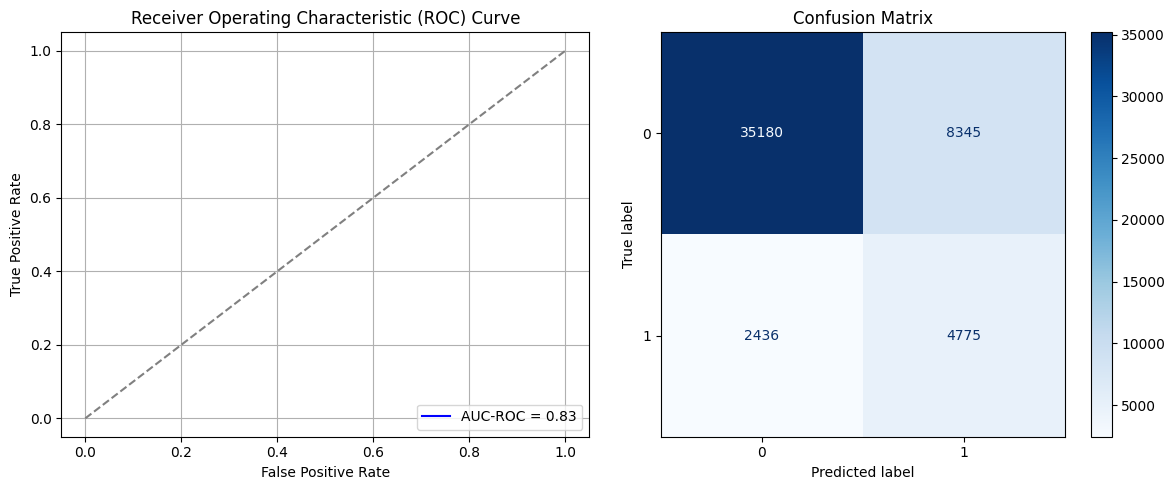

Best threshold based on F1-score: 0.5274593830108643


In [71]:
import random

times = 1


FPR = []
TPR = []
FNR = []
TNR = []


k = oversample_size/undersample_size
print(k)

# np.random.seed(123)

for i in range(times):
    start = random.randint(1, int(k))
    # print(start)

    Row = []

    for j in range(undersample_size):
      row = start+int(k*j)-1
      Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :21]
    y_Sy_train = data_Sy_RUS.iloc[:, 21]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



In [72]:
print(ParamFit)
# ParamFit.to_csv('Sy_RUS.csv')

        FPR       TPR       FNR       TNR
0  0.191729  0.662183  0.337817  0.808271


In [73]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

np.float64(0.33781722368603523)

## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

62.1322196552337
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7782 - loss: 0.5390 - val_AUC: 0.0000e+00 - val_loss: 0.6387
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8174 - loss: 0.4989 - val_AUC: 0.0000e+00 - val_loss: 0.5639
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8217 - loss: 0.4941 - val_AUC: 0.0000e+00 - val_loss: 0.6046
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8246 - loss: 0.4919 - val_AUC: 0.0000e+00 - val_loss: 0.6528
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8262 - loss: 0.4896 - val_AUC: 0.0000e+00 - val_loss: 0.6790
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8290 - loss: 0.4867 - val_AUC: 0.0000e+00 - val_loss: 0.6336
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8292 - loss: 0.4882 - val_AUC: 0.0000e+00 - val_loss: 0.6725
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8294 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.5141
Epoch 9/10
1407/140

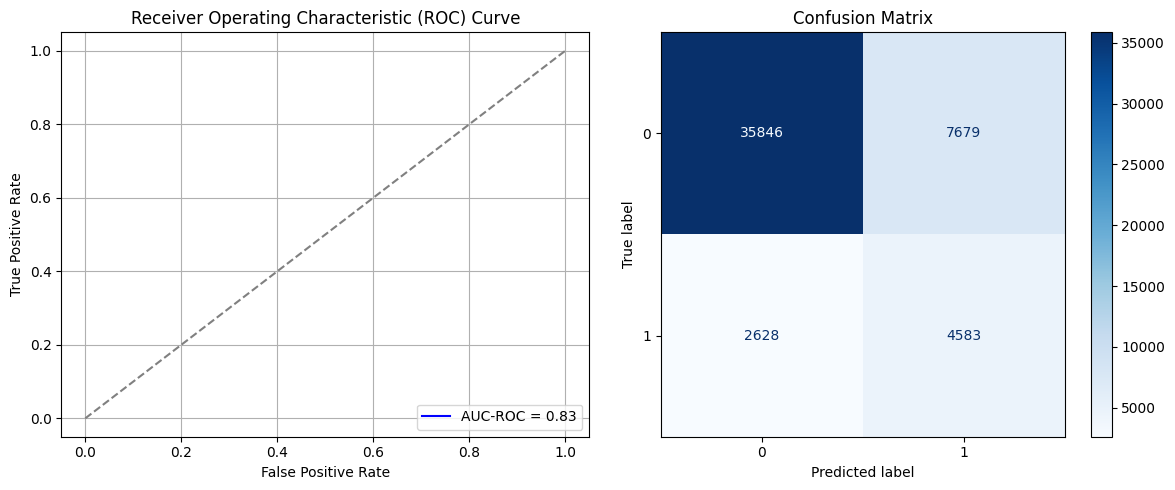

Best threshold based on F1-score: 0.5335013270378113


In [74]:
import random

times = 1


FPR = []
TPR = []
FNR = []
TNR = []


m = 10

k = oversample_size/undersample_size * m
print(k)

# np.random.seed(123)

for i in range(times):
    start = np.random.choice(int(k), m)
    # print(start)

    Row = []

    for j in range(len(start)):
      for l in range(int(undersample_size/m)):
        row = start[j]+int(k*l)-1
        Row.append(row)

    # print(Row)

    data_maj_rus = pd.DataFrame()
    data_maj_rus = data_majority.iloc[Row]

    data_Sy_RUS = pd.concat([data_maj_rus, data_minority])
    X_Sy_train = data_Sy_RUS.iloc[:, :21]
    y_Sy_train = data_Sy_RUS.iloc[:, 21]
    model_Sy = create_dnn_model(X_Sy_train.shape[1])
    result_Sy = train_and_evaluate_ml(model_Sy, X_Sy_train, X_test, y_Sy_train, y_test, "Source")

    FPR.append(result_Sy[0])
    TNR.append(result_Sy[1])
    FNR.append(result_Sy[2])
    TPR.append(result_Sy[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']



In [75]:
print(ParamFit)
# ParamFit.to_csv('Sy2_RUS.csv')

        FPR       TPR       FNR       TNR
0  0.176427  0.635557  0.364443  0.823573


In [76]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

np.float64(0.3644432117598114)

# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8741/8741 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - AUC: 0.8074 - loss: 0.5101 - val_AUC: 0.0000e+00 - val_loss: 0.8473
Epoch 2/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - AUC: 0.8249 - loss: 0.4907 - val_AUC: 0.0000e+00 - val_loss: 0.6394
Epoch 3/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8279 - loss: 0.4866 - val_AUC: 0.0000e+00 - val_loss: 0.6730
Epoch 4/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - AUC: 0.8307 - loss: 0.4844 - val_AUC: 0.0000e+00 - val_loss: 0.6250
Epoch 5/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8305 - loss: 0.4837 - val_AUC: 0.0000e+00 - val_loss: 0.6899
Epoch 6/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8336 - loss: 0.4807 - val_AUC: 0.0000e+00 - val_loss: 0.6180
Epoch 7/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8334 - loss: 0.4804 - val_AUC: 0.0000e+00 - val_loss: 0.6800
Epoch 8/10
8741/8741 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8341 - loss: 0.4793 - val_AUC: 0.0000e+00 - val_loss: 0.5856
Epoch 9/10


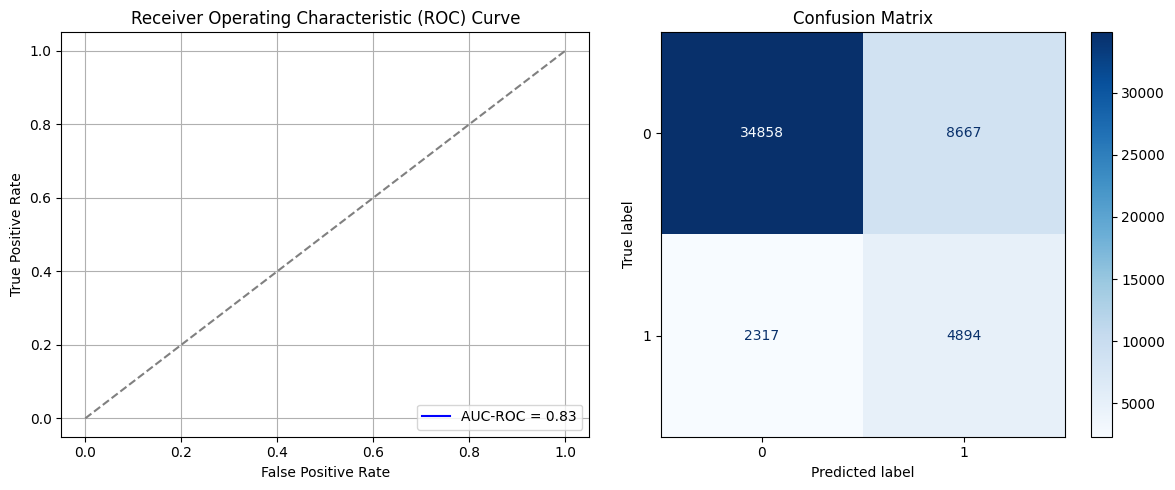

Best threshold based on F1-score: 0.5530154705047607


In [77]:
times = 1

Training_time = []
FPR = []
TPR = []
FNR = []
TNR = []
TL_time = []


for i in range(times):
    data_min_ros = data_minority.sample(n=oversample_size - undersample_size, replace=True)
    data_SRS_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_SRS_ROS_train = data_SRS_ROS.iloc[:, :21]
    y_SRS_ROS_train = data_SRS_ROS.iloc[:, 21]
    model_SRS_ROS = create_dnn_model(X_SRS_ROS_train.shape[1])
    result_SRS_ROS = train_and_evaluate_ml(model_SRS_ROS, X_SRS_ROS_train, X_test, y_SRS_ROS_train, y_test, "Source")

    FPR.append(result_SRS_ROS[0])
    TNR.append(result_SRS_ROS[1])
    FNR.append(result_SRS_ROS[2])
    TPR.append(result_SRS_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

In [78]:
print(ParamFit)
# ParamFit.to_csv('SRS_ROS2.csv')

        FPR       TPR       FNR       TNR
0  0.199127  0.678685  0.321315  0.800873


In [79]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.3213146581611427
StDev FNR: nan


## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.

In particular, taking $k=48$ yields a number of samples of $k*\frac{N_0-N_1}{N_1}=254.986 \approx 255$, so we take $k=48$.

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8737/8737 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - AUC: 0.8053 - loss: 0.5117 - val_AUC: 0.0000e+00 - val_loss: 0.6133
Epoch 2/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - AUC: 0.8268 - loss: 0.4886 - val_AUC: 0.0000e+00 - val_loss: 0.7768
Epoch 3/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - AUC: 0.8292 - loss: 0.4858 - val_AUC: 0.0000e+00 - val_loss: 0.6690
Epoch 4/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8299 - loss: 0.4847 - val_AUC: 0.0000e+00 - val_loss: 0.6147
Epoch 5/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8309 - loss: 0.4836 - val_AUC: 0.0000e+00 - val_loss: 0.7636
Epoch 6/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8314 - loss: 0.4826 - val_AUC: 0.0000e+00 - val_loss: 0.6376
Epoch 7/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8320 - loss: 0.4820 - val_AUC: 0.0000e+00 - val_loss: 0.7135
Epoch 8/10
8737/8737 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8343 - loss: 0.4797 - val_AUC: 0.0000e+00 - val_loss: 0.6504
Epoch 9/10


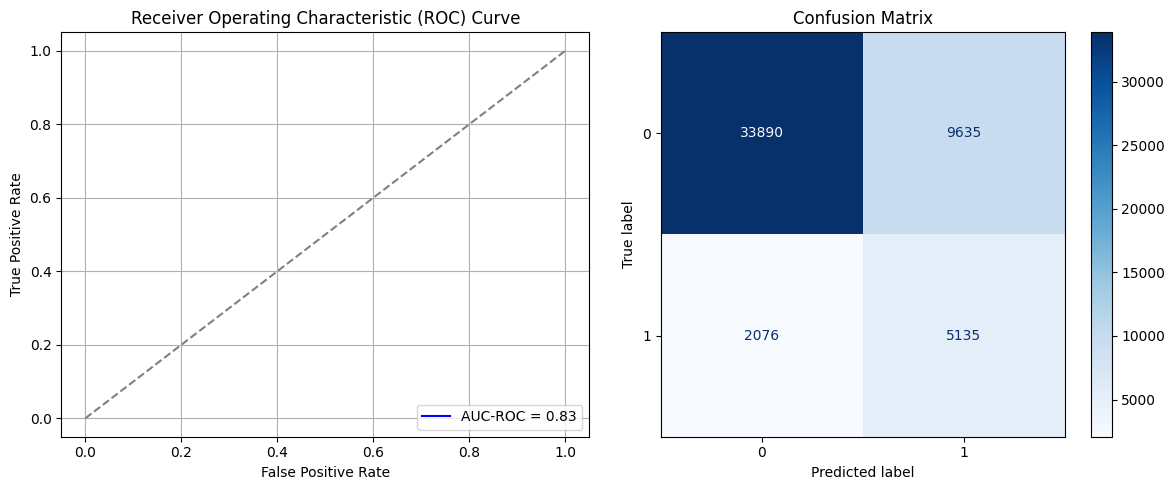

Best threshold based on F1-score: 0.5762668251991272


In [80]:
times = 1

FPR = []
TPR = []
FNR = []
TNR = []

k = 48
Nsamples = k*(oversample_size-undersample_size)/undersample_size



for i in range(times):
    start = np.random.choice(int(k), int(Nsamples), replace=True)
    Row = []
    for j in range(len(start)):
      for i in range(int(undersample_size/k)):
        row = start[j]+int(k*i)-1
        Row.append(row)
    data_min_ros = pd.DataFrame()
    data_min_ros = data_minority.iloc[Row]
    data_Sy_ROS = pd.concat([data_majority, data_min_ros, data_minority])
    X_Sy_ROS_train = data_Sy_ROS.iloc[:, :21]
    y_Sy_ROS_train = data_Sy_ROS.iloc[:, 21]
    model_Sy_ROS = create_dnn_model(X_Sy_ROS_train.shape[1])
    result_Sy_ROS = train_and_evaluate_ml(model_Sy_ROS, X_Sy_ROS_train, X_test, y_Sy_ROS_train, y_test, "Source")

    FPR.append(result_Sy_ROS[0])
    TNR.append(result_Sy_ROS[1])
    FNR.append(result_Sy_ROS[2])
    TPR.append(result_Sy_ROS[3])

ParamFit = pd.DataFrame([FPR, TPR, FNR, TNR]).T
ParamFit.columns=['FPR', 'TPR', 'FNR', 'TNR']

In [81]:
print(ParamFit)
# ParamFit.to_csv('Sy_ROS2.csv')

        FPR       TPR       FNR       TNR
0  0.221367  0.712107  0.287893  0.778633


In [82]:
print('Mean FNR:', ParamFit['FNR'].mean())
print('StDev FNR:', ParamFit['FNR'].std())

Mean FNR: 0.2878934960477049
StDev FNR: nan
